In [5]:
from new_helper_functions import walk_through_dir

In [6]:
# check for GPUs
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Details:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.19.0
Num GPUs Available: 1
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
walk_through_dir("ham10000_dataset_split")


There are 3 directories and 0 images in 'ham10000_dataset_split'.
There are 7 directories and 0 images in 'ham10000_dataset_split/test'.
There are 0 directories and 49 images in 'ham10000_dataset_split/test/akiec'.
There are 0 directories and 77 images in 'ham10000_dataset_split/test/bcc'.
There are 0 directories and 165 images in 'ham10000_dataset_split/test/bkl'.
There are 0 directories and 17 images in 'ham10000_dataset_split/test/df'.
There are 0 directories and 167 images in 'ham10000_dataset_split/test/mel'.
There are 0 directories and 1006 images in 'ham10000_dataset_split/test/nv'.
There are 0 directories and 22 images in 'ham10000_dataset_split/test/vasc'.
There are 7 directories and 0 images in 'ham10000_dataset_split/train'.
There are 0 directories and 229 images in 'ham10000_dataset_split/train/akiec'.
There are 0 directories and 360 images in 'ham10000_dataset_split/train/bcc'.
There are 0 directories and 769 images in 'ham10000_dataset_split/train/bkl'.
There are 0 direct

In [8]:
train_dir = '/mnt/c/Users/vaibh/OneDrive/Desktop/Skin-Cancer-Detection/ham10000_dataset_split/train'
test_dir = '/mnt/c/Users/vaibh/OneDrive/Desktop/Skin-Cancer-Detection/ham10000_dataset_split/test'
val_dir = '/mnt/c/Users/vaibh/OneDrive/Desktop/Skin-Cancer-Detection/ham10000_dataset_split/val'


In [9]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224, 224)
BATCH_SIZE = 8

train_data = image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_data = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_data = image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)


Found 7010 files belonging to 7 classes.


I0000 00:00:1756029940.683651   19027 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1751 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Found 1503 files belonging to 7 classes.
Found 1502 files belonging to 7 classes.
Found 1502 files belonging to 7 classes.


In [10]:
class_names = train_data.class_names
class_names

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

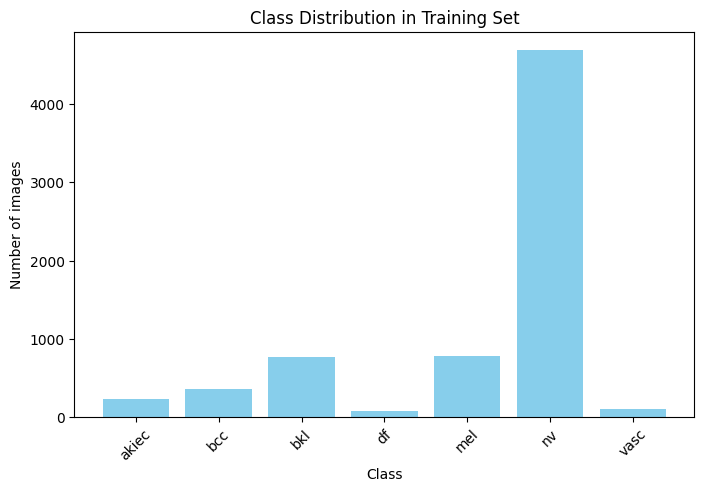

In [41]:
# Visualize class distribution
import matplotlib.pyplot as plt
import numpy as np
class_counts = {class_name: 0 for class_name in class_names}
for _, labels in train_data:
    for label in labels.numpy():
        class_counts[class_names[label]] += 1
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45)
plt.show()

# Visualizing the Dataset

2025-08-24 09:49:13.450162: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


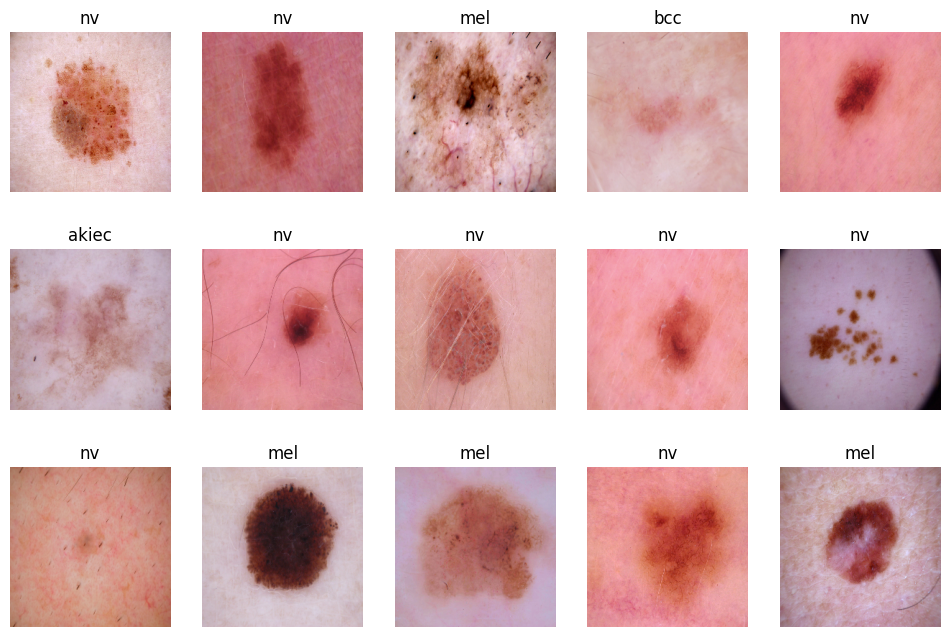

In [42]:
plt.figure(figsize=(12, 8))
for images, labels in train_data.take(1):
	for i in range(15): # show 15 images
		ax = plt.subplot(3, 5, i+1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")
plt.show()

# Data Augmentation

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.3)
])

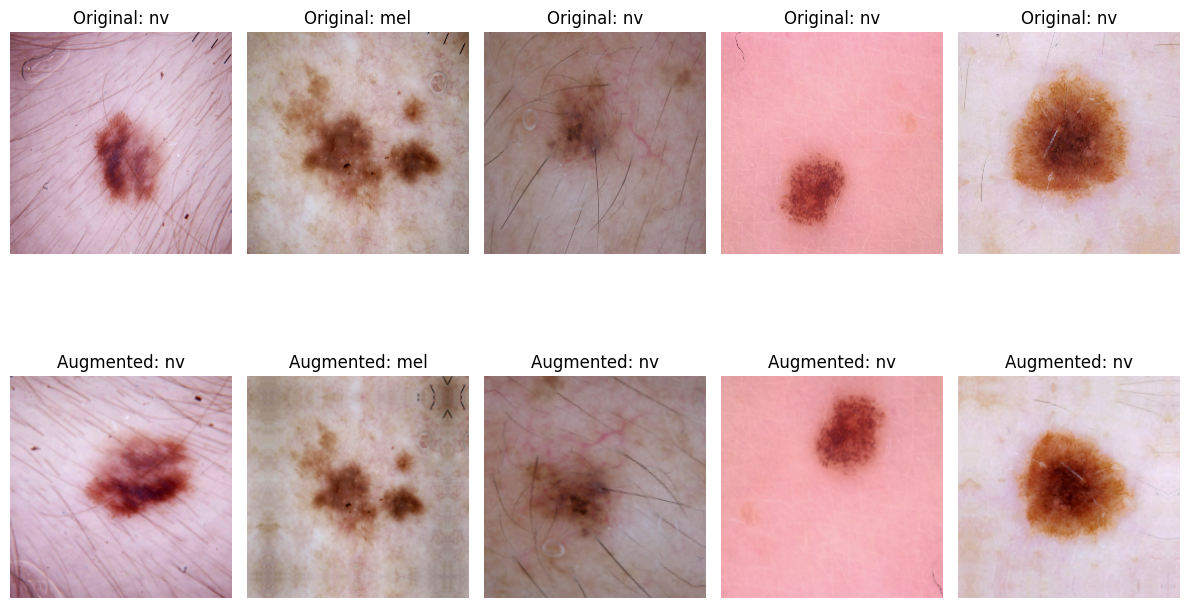

In [25]:
# Visualize augmented images
import tensorflow as tf
plt.figure(figsize=(12,8))
for images, labels in train_data.take(1):
    for i in range(5): # show 5 original and augmented images
        # Display original image
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Original: {class_names[labels[i]]}")
        plt.axis("off")
        
        # Display augmented image
        augmented_img = data_augmentation(tf.expand_dims(images[i],0))[0]
        ax = plt.subplot(2, 5, i+6)
        plt.imshow(augmented_img.numpy().astype("uint8"))
        plt.title(f"Augmented: {class_names[labels[i]]}")
        plt.axis("off")
plt.tight_layout()  
plt.show()

# Model 1 Baseline Model 
* using the CNN explainer Architecture

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential()
model_1.add(layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model_1.add(data_augmentation)  # Add data augmentation layer
model_1.add(layers.Rescaling(1./255))  # Add rescaling layer to normalize pixel values
model_1.add(Conv2D(32, 3, activation='relu'))
model_1.add(MaxPool2D(pool_size=2))
model_1.add(Conv2D(32, 3, activation='relu'))
model_1.add(Conv2D(32, 3, activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(7, activation='softmax'))

In [27]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 107, 107, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 366368)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    46,895,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,915,527 (178.97 MB)

 Trainable params: 46,915,527 (178.97 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Before Rescaling

In [29]:
history_1 = model_1.fit(train_data, validation_data=val_data, epochs=2)


Epoch 1/2
220/220 ━━━━━━━━━━━━━━━━━━━━ 109s 489ms/step - accuracy: 0.5912 - loss: 171.6268 - val_accuracy: 0.6691 - val_loss: 1.1612
Epoch 2/2
220/220 ━━━━━━━━━━━━━━━━━━━━ 102s 462ms/step - accuracy: 0.6643 - loss: 1.1575 - val_accuracy: 0.6691 - val_loss: 1.1249


After Rescaling

In [29]:
from new_helper_functions import plot_loss_curves

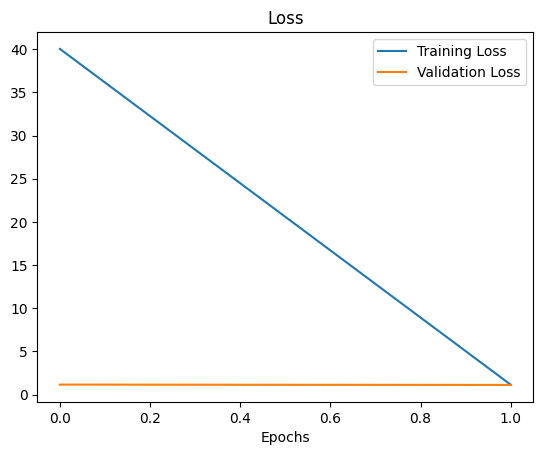

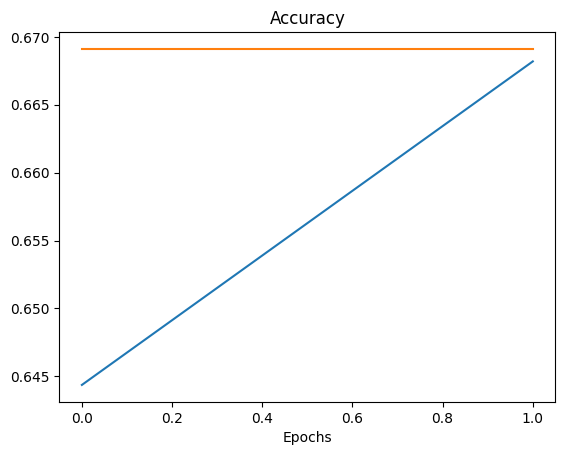

In [36]:
plot_loss_curves(history_1)

In [30]:
history_baseline_model_1 = model_1.fit(train_data, validation_data=val_data, epochs=2)


Epoch 1/2


I0000 00:00:1756027690.135084    3575 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/220 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.1641 - loss: 10.1793   

2025-08-24 09:28:12.555213: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 234.02MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-08-24 09:28:12.555294: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 233.30MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-08-24 09:28:12.555309: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 233.34MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-08-24 09:28:12.555320: W external/local_xla/

220/220 ━━━━━━━━━━━━━━━━━━━━ 26s 94ms/step - accuracy: 0.6307 - loss: 2.4320 - val_accuracy: 0.6711 - val_loss: 0.9938
Epoch 2/2
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.6738 - loss: 0.9880 - val_accuracy: 0.6751 - val_loss: 0.9184


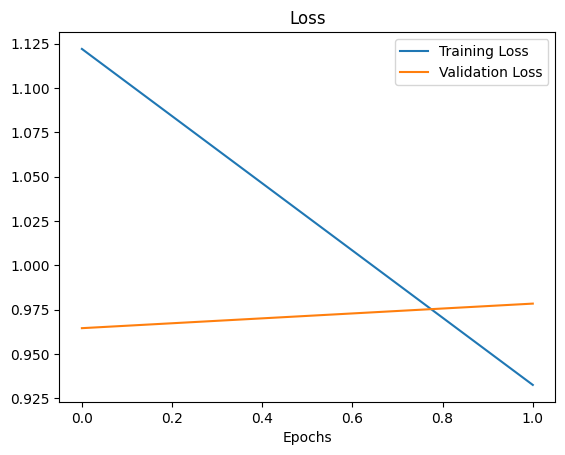

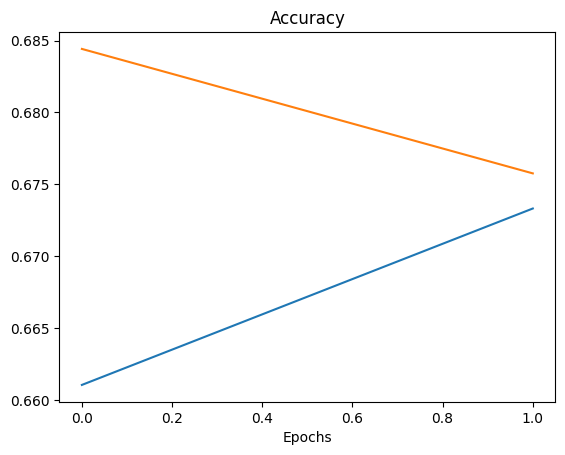

In [37]:
plot_loss_curves(history_baseline_model_1)

# Adjusting Class Weights so that no imbalance datas effect the loss or accuracy

Extract labels from train_data

In [12]:
import numpy as np

labels = []
for _, y in train_data.unbatch():
    labels.append(y.numpy())

train_labels = np.array(labels)

2025-08-24 10:06:05.234221: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
# Compute balanced class weights
from sklearn.utils.class_weight import compute_class_weight
classes = np.unique(train_labels)
weights = compute_class_weight(
    class_weight='balanced',
      classes=classes, 
      y=train_labels)
class_weights = dict(zip(classes, weights))
weights = weights / np.mean(weights)          # mean 1.0
weights = np.clip(weights, 0.5, 5.0)          # keep reasonable range
class_weight = dict(zip(classes, weights))

print("Class distribution:", dict(zip(*np.unique(train_labels, return_counts=True))))
print("Class weight dict:", class_weight)

Class distribution: {np.int32(0): np.int64(229), np.int32(1): np.int64(360), np.int32(2): np.int64(769), np.int32(3): np.int64(81), np.int32(4): np.int64(779), np.int32(5): np.int64(4693), np.int32(6): np.int64(99)}
Class weight dict: {np.int32(0): np.float64(0.9437835391512194), np.int32(1): np.float64(0.600351195737859), np.int32(2): np.float64(0.5), np.int32(3): np.float64(2.668227536612707), np.int32(4): np.float64(0.5), np.int32(5): np.float64(0.5), np.int32(6): np.float64(2.1830952572285782)}


In [17]:
class_weight

{np.int32(0): np.float64(0.9437835391512194),
 np.int32(1): np.float64(0.600351195737859),
 np.int32(2): np.float64(0.5),
 np.int32(3): np.float64(2.668227536612707),
 np.int32(4): np.float64(0.5),
 np.int32(5): np.float64(0.5),
 np.int32(6): np.float64(2.1830952572285782)}

In [18]:
# turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")  # set global policy to mixed precision training

In [19]:
print(mixed_precision.global_policy())


<DTypePolicy "mixed_float16">


In [20]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D

model_2 = Sequential()
model_2.add(layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model_2.add(data_augmentation)  # Add data augmentation layer
model_2.add(layers.Rescaling(1./255))  # Add rescaling layer to normalize pixel values
model_2.add(Conv2D(32, 3, activation='relu'))
model_2.add(MaxPool2D(pool_size=2))
model_2.add(Conv2D(32, 3, activation='relu'))
model_2.add(Conv2D(32, 3, activation='relu'))
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(7, activation='softmax'))

In [26]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 107, 107, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,563 (287.37 KB)

 Trainable params: 24,519 (95.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,044 (191.59 KB)

In [21]:
model_2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [36]:
history_2_Added_Class_Weights = model_2.fit(
    train_data,
    validation_data=val_data,
    epochs=4,
    class_weight=class_weight, 
)

Epoch 1/4
877/877 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.6310 - loss: 0.6508 - val_accuracy: 0.6718 - val_loss: 0.9353
Epoch 2/4
877/877 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.6565 - loss: 0.6140 - val_accuracy: 0.6611 - val_loss: 0.9166
Epoch 3/4
877/877 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.6597 - loss: 0.5979 - val_accuracy: 0.6831 - val_loss: 0.9110
Epoch 4/4
877/877 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.6702 - loss: 0.5893 - val_accuracy: 0.6831 - val_loss: 0.8902


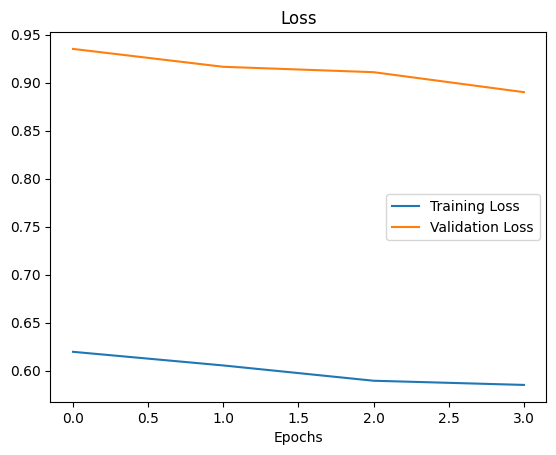

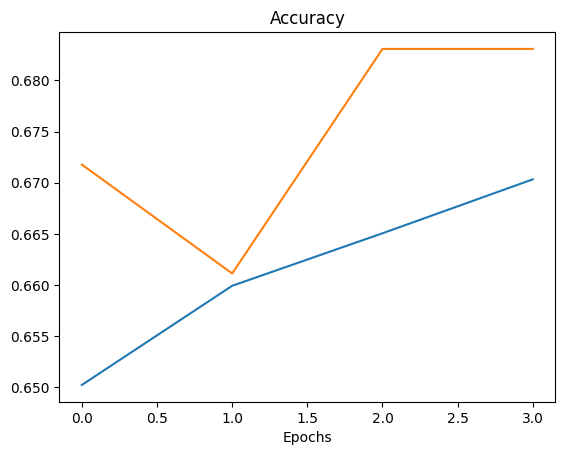

In [37]:
from new_helper_functions import plot_loss_curves
plot_loss_curves(history_2_Added_Class_Weights)

In [38]:
model_2.evaluate(test_data)

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6722 - loss: 0.8832


[0.9116125702857971, 0.6646706461906433]

# Imporving our Model_2

* Changes made: added padding = 'same' for Conv2D layers and increasing filters , Lowered the Learning Rate

In [45]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization

model_3 = Sequential()
model_3.add(layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model_3.add(data_augmentation)  # Add data augmentation layer
model_3.add(layers.Rescaling(1./255))  # Add rescaling layer to normalize 
model_3.add(Conv2D(32, 3, activation='relu', padding='same', ))
model_3.add(BatchNormalization()) # adding batch normalization
model_3.add(Conv2D(32, 3, activation='relu', padding='same', ))
model_3.add(BatchNormalization()) # adding batch normalization
model_3.add(MaxPool2D(pool_size=2))
model_3.add(Conv2D(64, 3, activation='relu',padding='same',))
model_3.add(BatchNormalization()) # adding batch normalization
model_3.add(Conv2D(64, 3, activation='relu',padding='same',))
model_3.add(BatchNormalization()) # adding batch normalization
model_3.add(GlobalAveragePooling2D())
model_3.add(layers.Dropout(0.2))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(layers.Dropout(0.3))
model_3.add(Dense(7, activation='softmax'))

In [46]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,071 (359.65 KB)

 Trainable params: 91,687 (358.15 KB)

 Non-trainable params: 384 (1.50 KB)

In [47]:
model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
    metrics=['accuracy']
)

In [48]:
class_weight

{np.int32(0): np.float64(0.9437835391512194),
 np.int32(1): np.float64(0.600351195737859),
 np.int32(2): np.float64(0.5),
 np.int32(3): np.float64(2.668227536612707),
 np.int32(4): np.float64(0.5),
 np.int32(5): np.float64(0.5),
 np.int32(6): np.float64(2.1830952572285782)}

In [49]:
history_improving_model_3 = model_3.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weight, 
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 70s 76ms/step - accuracy: 0.6260 - loss: 0.7740 - val_accuracy: 0.6791 - val_loss: 1.0394
Epoch 2/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 67s 77ms/step - accuracy: 0.6647 - loss: 0.6786 - val_accuracy: 0.6698 - val_loss: 0.9354
Epoch 3/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 68s 78ms/step - accuracy: 0.6610 - loss: 0.6569 - val_accuracy: 0.6505 - val_loss: 0.9838
Epoch 4/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 68s 78ms/step - accuracy: 0.6698 - loss: 0.6298 - val_accuracy: 0.6578 - val_loss: 1.0239
Epoch 5/10
877/877 ━━━━━━━━━━━━━━━━━━━━ 68s 78ms/step - accuracy: 0.6667 - loss: 0.6170 - val_accuracy: 0.2031 - val_loss: 3.8946


In [50]:
model_3.evaluate(test_data)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6839 - loss: 0.9084


[0.935120165348053, 0.6699933409690857]

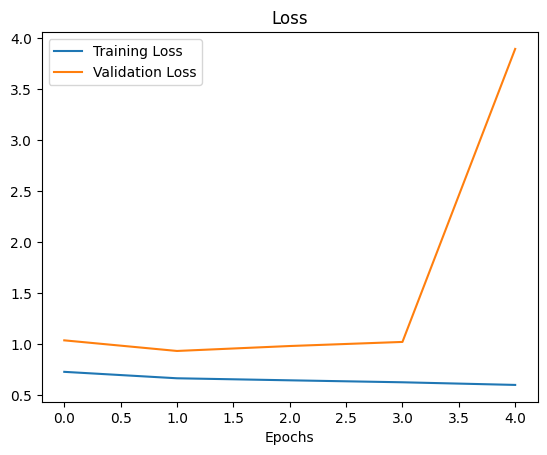

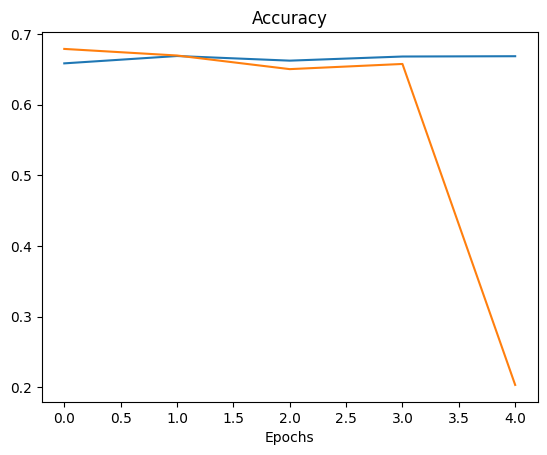

In [51]:
plot_loss_curves(history_improving_model_3)